In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%run DOCK_OutputParser.ipynb

In [2]:
#############################         USAGE NOTE         ################################
# Run the three enrichment notebooks with the required selection of structures first.   #
# This will generate the required *.npy files used in generating these combined plots   #
#########################################################################################

to_compare=[]

# Xtal
to_compare.append(["bidock_final_cryst/dockout/","Xtal","black"])
#to_compare.append(["bidock_final_cryst/dockout_sel2/","Xtal*","black"]) # Run with a different set of parameters
                                                                         # and make a copy of the dockout file if comparing cases in the same folder
# AF2
to_compare.append(["bidock_final_AF2/dockout/","AF2","red"])

# AF2RAVE
to_compare.append(["optSPIB_MD3/dockout/","AF2RAVE*","#0000FF"])

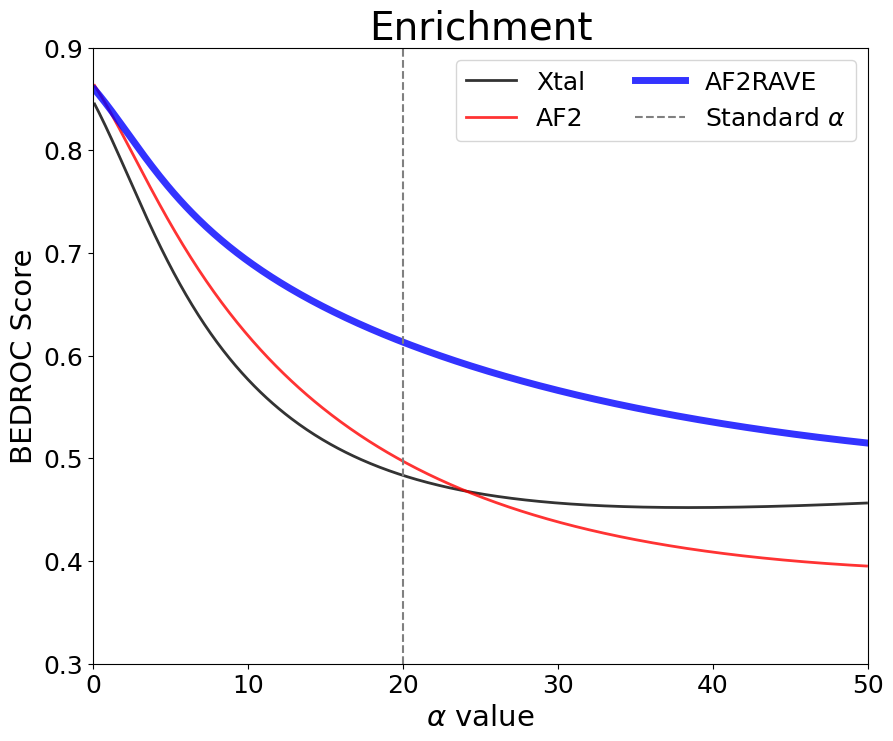

In [7]:
ADD_TEXT=False

data_dicts=dict()
LINEWIDTH=8 if ADD_TEXT else 5
END_POINT=50+(15 if ADD_TEXT else 0)
plt.figure(figsize=(10,8))
plt.title("Enrichment",fontsize=28)
for directory,label_name,linecol in to_compare:
    data_file=np.load(directory+"/bedrock_scores.npy")
    effective_label_name=label_name.replace("*","").split(" ")[0].strip()
    data_dicts[effective_label_name]=data_file
    plt.plot(data_file[0],data_file[1],linewidth=LINEWIDTH if "*" in label_name else 2,c=linecol,label=label_name.replace("*","").replace("_"," "), linestyle="--" if ("Old" in label_name) or ("old" in label_name) or ("out" in label_name) or ("top" in label_name) else "-",alpha=0.8)
    if ADD_TEXT:
        plt.text(END_POINT-3*len(effective_label_name),max(0.125,data_file[1][-1])-(0.02 if "\n" in label_name else 0.01)+0.0333,effective_label_name,color=linecol if "AF" in label_name or "SBi" in label_name else "black",fontsize=24)
plt.axvline(x=20,linestyle="--",color="grey",label="Standard $\\alpha$")
if not ADD_TEXT: plt.legend(fontsize=18,ncol=2)
plt.xlabel("$\\alpha$ value",fontsize=21)
plt.ylabel("BEDROC Score",fontsize=21)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.xlim(0,END_POINT)
plt.ylim(0.3,0.9)
plt.show()